In [1]:
import pickle
import os
import numpy as np

# Definisci manualmente il nome del file pickle da importare
pkl_file = '/home/phd2/Scrivania/CorsoRepo/cellPIV/datasets/Farneback/pickles/sum_mean_mag.pkl'

if not os.path.isfile(pkl_file):
    raise FileNotFoundError(f"Il file {pkl_file} non esiste nella cartella corrente.")

# Carica il file pkl
with open(pkl_file, 'rb') as f:
    data = pickle.load(f)

print(f"Tipo di dato caricato: {type(data)}")
if not isinstance(data, dict):
    raise ValueError("Il file pickle non contiene un dizionario come previsto.")
print(f"Chiavi del dizionario: {list(data.keys())[:5]}... (totale {len(data)} chiavi)")

# Numero di chiavi (campioni) nel dizionario
print(f"Numero di campioni nel dizionario: {len(data)}")

# Lunghezza media degli array
array_lengths = [v.shape[0] for v in data.values()]
print(f"Lunghezza media degli array: {np.mean(array_lengths):.2f}")
print(f"Lunghezza minima: {np.min(array_lengths)}, massima: {np.max(array_lengths)}")

# Statistiche globali su tutti i valori
all_values = np.concatenate(list(data.values()))
print(f"Valore medio globale: {np.mean(all_values):.4f}")
print(f"Deviazione standard globale: {np.std(all_values):.4f}")
print(f"Valore minimo globale: {np.min(all_values):.4f}")
print(f"Valore massimo globale: {np.max(all_values):.4f}")

# Visualizza le prime 3 chiavi e le prime 5 entry di ciascun array
for k in list(data.keys())[:3]:
    print(f"{k}: {data[k][:5]}")

# 6001 campioni, ok perché 1 errore durante elaborazione flusso ottico


Tipo di dato caricato: <class 'dict'>
Chiavi del dizionario: ['D2018.07.11_S02062_I0141_D_3', 'D2016.10.29_S1633_I141_1', 'D2015.01.24_S1208_I141_2', 'D2020.03.11_S02490_I0141_D_1', 'D2015.03.21_S1247_I141_6']... (totale 6001 chiavi)
Numero di campioni nel dizionario: 6001
Lunghezza media degli array: 628.69
Lunghezza minima: 367, massima: 1037
Valore medio globale: 0.3260
Deviazione standard globale: 0.2885
Valore minimo globale: 0.0000
Valore massimo globale: 6.6302
D2018.07.11_S02062_I0141_D_3: [0.26745614 0.30790812 0.30067766 0.28125298 0.23757152]
D2016.10.29_S1633_I141_1: [0.53883767 0.49880618 0.49152559 0.45395136 0.45315379]
D2015.01.24_S1208_I141_2: [0.38474974 0.34171826 0.33590299 0.30084687 0.268374  ]


In [4]:
# Imposta la soglia di lunghezza
soglia_lunghezza = 24*4*7

# Filtra le chiavi in base alla lunghezza dell'array associato
chiavi_filtrate = {
    k: v.shape[0]  # k è la chiave (dish_well), v.shape[0] è la sua lunghezza
    for k, v in data.items()
    if v.shape[0] > soglia_lunghezza
}

# Stampa i risultati
print(f"Numero totale di campioni con lunghezza > {soglia_lunghezza}: {len(chiavi_filtrate)}")

if chiavi_filtrate:
    print(f"\nCampioni (dish_well) con lunghezza maggiore di {soglia_lunghezza}:")
    # Stampa in un formato più leggibile: chiave (lunghezza)
    for k, length in chiavi_filtrate.items():
        print(f"  - {k} ({length})")
else:
    print(f"\nNessun campione trovato con lunghezza maggiore di {soglia_lunghezza}.")

Numero totale di campioni con lunghezza > 672: 544

Campioni (dish_well) con lunghezza maggiore di 672:
  - D2017.02.05_S1691_I141_2 (879)
  - D2016.10.24_S1630_I141_11 (736)
  - D2014.10.01_S1126_I141_8 (765)
  - D2014.09.06_S1093_I141_5 (678)
  - D2018.12.08_S02155_I0141_D_4 (681)
  - D2016.06.22_S1548_I141_4 (780)
  - D2016.01.27_S1437_I141_5 (777)
  - D2020.03.21_S02495_I0141_D_6 (851)
  - D2017.09.30_S1862_I141_3 (677)
  - D2018.02.21_S01966_I0141_D_4 (679)
  - D2019.01.30_S02194_I0141_D_10 (676)
  - D2018.04.13_S02010_I0141_D_6 (751)
  - D2017.04.18_S1735_I141_7 (769)
  - D2018.09.05_S02078_I0141_D_6 (745)
  - D2017.05.02_S1743_I141_10 (678)
  - D2017.05.02_S1743_I141_9 (678)
  - D2020.02.08_S02467_I0141_D_4 (679)
  - D2017.10.09_S1868_I141_7 (674)
  - D2020.10.28_S02665_I0141_D_11 (763)
  - D2016.09.14_S1601_I141_4 (834)
  - D2017.06.01_S1772_I141_6 (674)
  - D2018.02.21_S01966_I0141_D_5 (679)
  - D2019.07.20_S02335_I0141_D_4 (871)
  - D2017.10.09_S1868_I141_5 (674)
  - D2016.04

File non trovato: std_dev.pkl - Skipping.
Uso 'D2016.10.29_S1633_I141_1' come chiave per ciascuna metric.


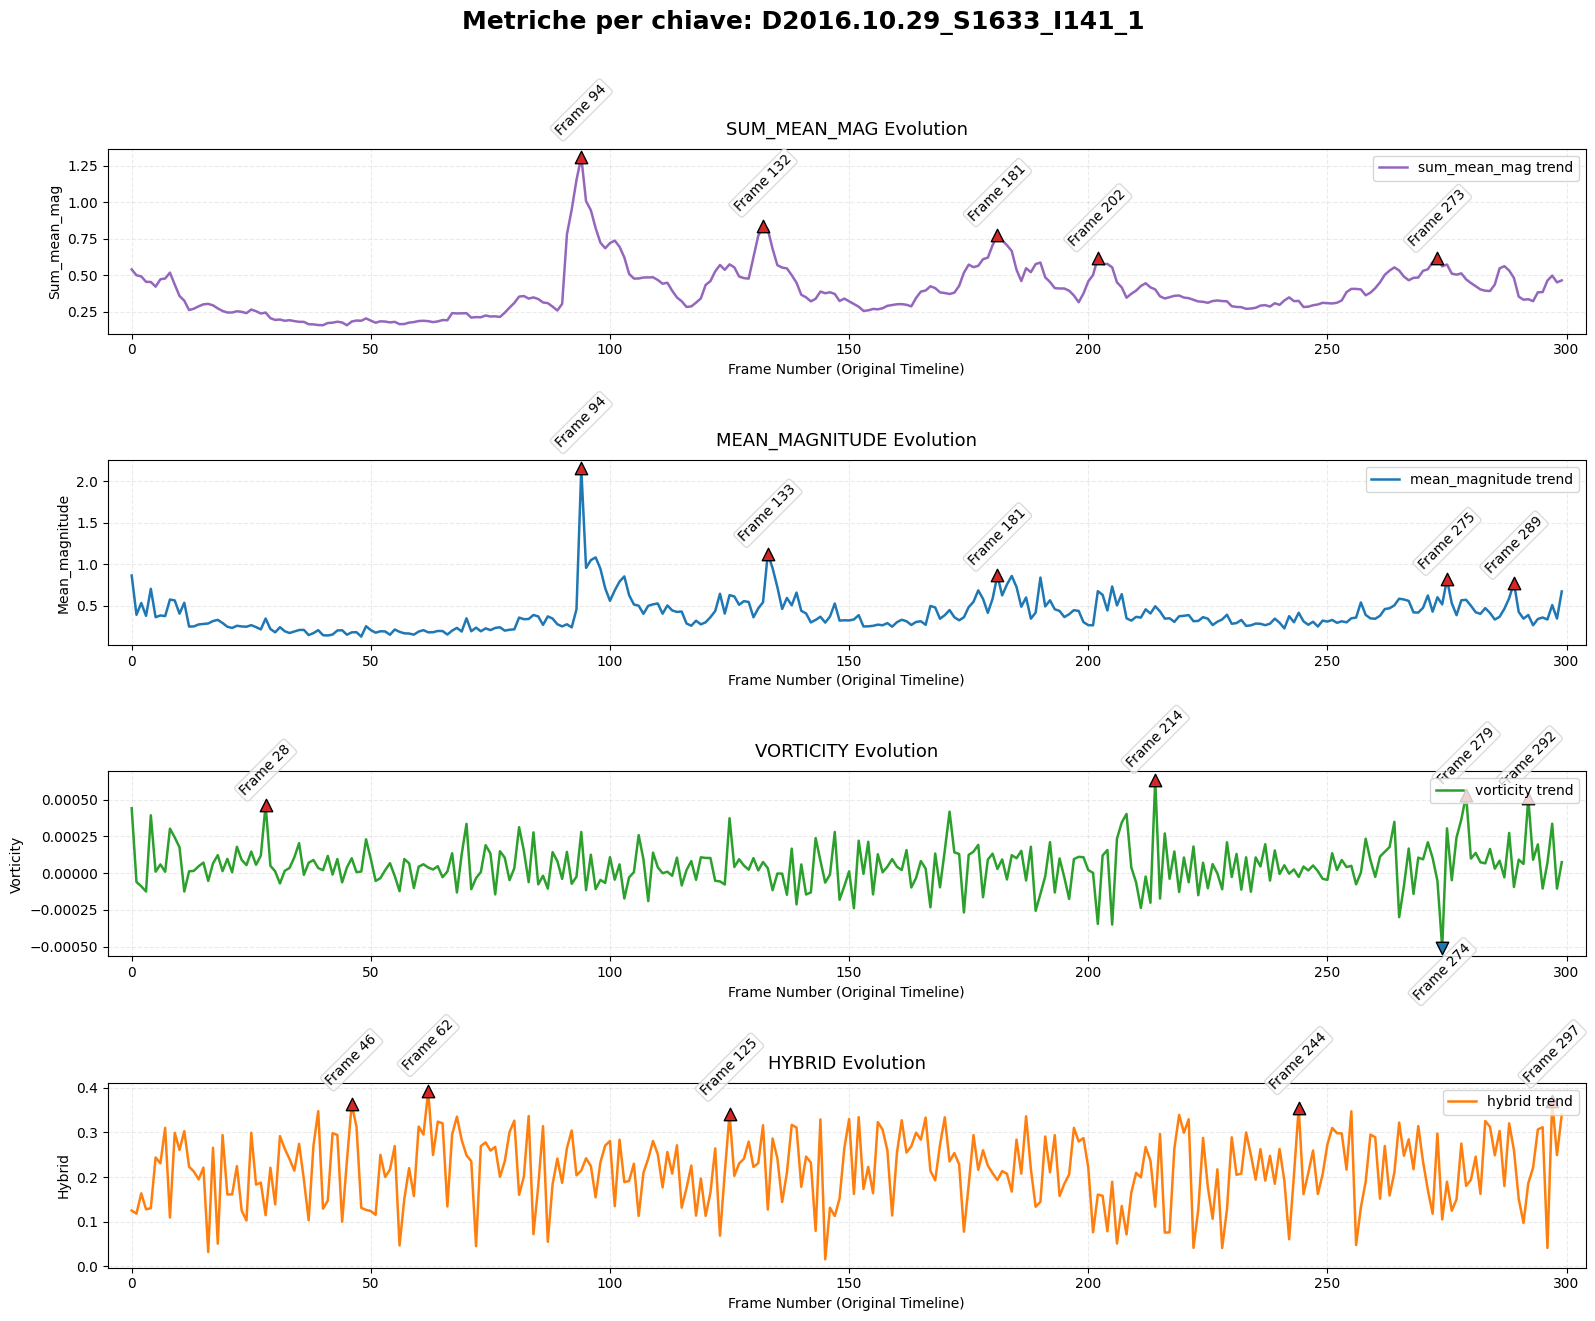

In [2]:
from scipy.signal import find_peaks
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Lista dei file pkl da importare in ordine
pkl_dir_path = '/home/phd2/Scrivania/CorsoRepo/cellPIV/datasets/Farneback/pickles'
os.chdir(pkl_dir_path)  # Cambia la directory di lavoro alla cartella dei
pkl_files = [
    'sum_mean_mag.pkl',
    'mean_magnitude.pkl',
    'vorticity.pkl',
    'std_dev.pkl',
    'hybrid.pkl'
]

dish_well_key = "D2016.10.29_S1633_I141_1"     # Esempio di chiave da usare

# Carica i dati solo dai file pkl esistenti
metrics = {}
for file in pkl_files:
    if os.path.isfile(file):
        metric_name = file.replace('.pkl', '')
        with open(file, 'rb') as f:
            metrics[metric_name] = pickle.load(f)
    else:
        print(f"File non trovato: {file} - Skipping.")

# Scegli la chiave da usare per tutti i metric
selected_key = None
if dish_well_key is not None:
    # Verifica che la chiave esista in tutti i metric
    found_in_all = all(dish_well_key in v for v in metrics.values())
    if found_in_all:
        selected_key = dish_well_key
        print(f"Uso '{dish_well_key}' come chiave per ciascuna metric.")
    else:
        print(f"Chiave '{dish_well_key}' non trovata in tutti i file. Uso la prima chiave disponibile per ciascuna metric.")
else:
    print("dish_well_key non definita. Uso la prima chiave disponibile per ciascuna metric.")

# Prepara i dati da plottare
metrics_arrays = {}
for k, v in metrics.items():
    if selected_key is not None and selected_key in v:
        metrics_arrays[k] = v[selected_key]
    else:
        first_key = next(iter(v))
        metrics_arrays[k] = v[first_key]

# Parametri di plotting
start_frame = 0
end_frame = 300  # Usa None per includere tutti i frame

# Visualizzazione inline
metric_colors = {
    'mean_magnitude': '#1f77b4',
    'vorticity': '#2ca02c',
    'std_dev': '#d62728',
    'hybrid': '#ff7f0e',
    'sum_mean_mag': '#9467bd'
}

if len(metrics_arrays) == 0:
    print("Nessun file pkl trovato, nessun plot verrà generato.")
else:
    fig, axes = plt.subplots(len(metrics_arrays), 1, figsize=(16, 14))
    if len(metrics_arrays) == 1:
        axes = [axes]
    peak_config = {'distance': 12}

    for ax, (metric_name, values) in zip(axes, metrics_arrays.items()):
        # Applica slicing se end_frame è definito
        if end_frame is not None:
            values = values[start_frame:end_frame]
            adjusted_frames = np.arange(start_frame, min(end_frame, start_frame + len(values)))
        else:
            values = values[start_frame:]
            adjusted_frames = np.arange(start_frame, start_frame + len(values))

        ax.plot(adjusted_frames, values,
                lw=1.8,
                color=metric_colors.get(metric_name, '#333333'),
                label=f'{metric_name} trend')
        values = np.nan_to_num(values)
        peaks_pos, _ = find_peaks(values, **peak_config)
        peaks_neg, _ = find_peaks(-values, **peak_config)
        all_peaks = np.unique(np.concatenate((peaks_pos, peaks_neg)))
        if len(all_peaks) > 0:
            peak_abs = np.abs(values[all_peaks])
            top_indices = np.argsort(peak_abs)[-5:]
            top_peaks = all_peaks[top_indices]
            for idx, peak in enumerate(top_peaks):
                frame_num = peak + start_frame
                value = values[peak]
                color = '#d62728' if value > 0 else '#1f77b4'
                marker = '^' if value > 0 else 'v'
                ax.scatter(frame_num, value,
                           c=color, marker=marker,
                           zorder=5, s=80, edgecolor='black')
                ax.text(frame_num,
                        value*(1.1 if value > 0 else 0.9),
                        f'Frame {frame_num}',
                        ha='center', va='bottom' if value > 0 else 'top',
                        rotation=45, fontsize=10,
                        bbox=dict(facecolor='white',
                                  alpha=0.8,
                                  edgecolor='lightgray',
                                  boxstyle='round,pad=0.2'))
        ax.set_title(f"{metric_name.upper()} Evolution", fontsize=13, pad=10)
        ax.set_xlabel("Frame Number (Original Timeline)", fontsize=10)
        ax.set_ylabel(metric_name.capitalize(), fontsize=10)
        ax.grid(alpha=0.25, linestyle='--')
        ax.legend(loc='upper right', fontsize=10)
        ax.set_xlim(adjusted_frames[0]-5, adjusted_frames[-1]+5)

    # Titolo generale
    plot_title = f"Metriche per chiave: {selected_key if selected_key is not None else 'prima chiave disponibile'}"
    fig.suptitle(plot_title, fontsize=18, fontweight='bold')
    plt.tight_layout(rect=[0, 0.04, 1, 0.97])
    plt.show()

Usando la stessa chiave del plot precedente, ovvero: D2016.10.29_S1633_I141_1


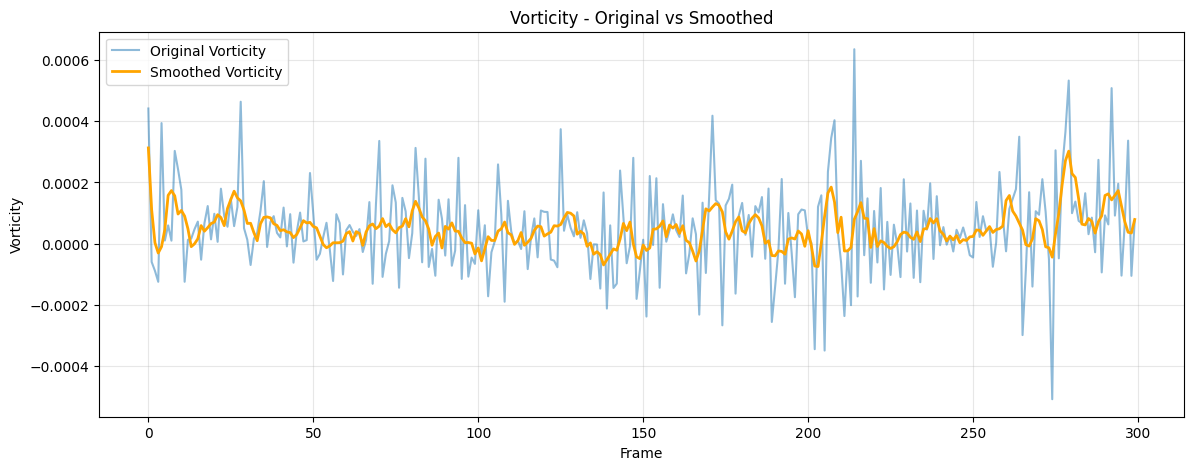

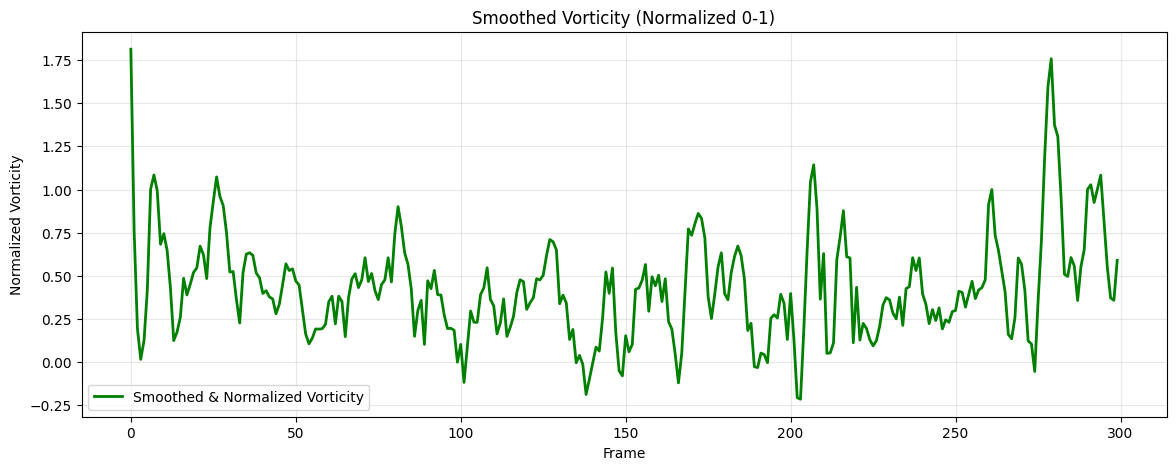

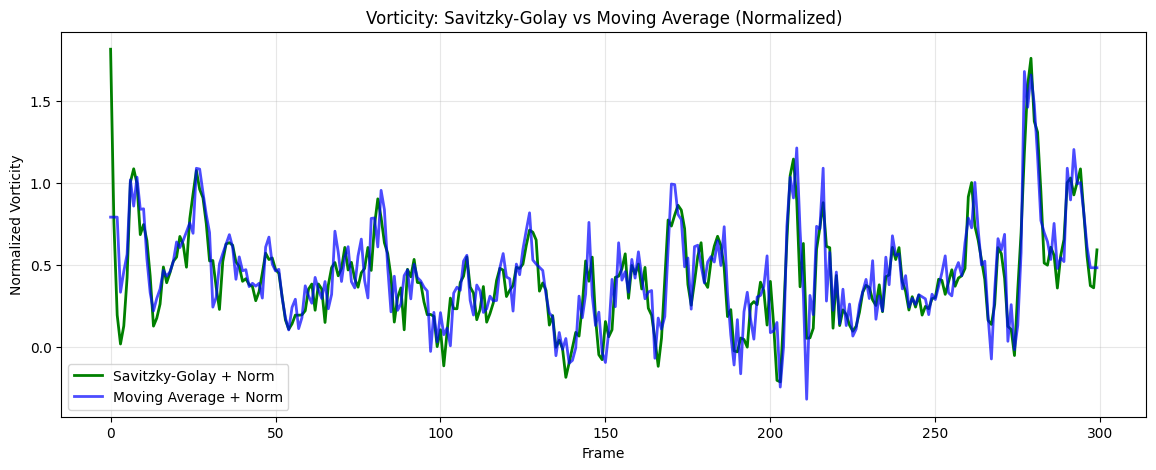

In [3]:
from scipy.signal import savgol_filter

def normalize_percentile(arr, pmin=5, pmax=95):
    lower = np.percentile(arr, pmin)
    upper = np.percentile(arr, pmax)
    if upper > lower:
        norm = (arr - lower) / (upper - lower)
    else:
        norm = np.zeros_like(arr)
    return norm

use_default_key = True  # Cambia a False per usare una chiave specifica
# Usa la stessa dish_well_key del plot precedente se definita, altrimenti usa una di default
if use_default_key:
    print("Usando la stessa chiave del plot precedente, ovvero:", dish_well_key)
else:
    dish_well_key = "D2016.10.29_S1633_I141_1"
    print(f"Usando chiave specifica: {dish_well_key}")


# Prendi la serie "vorticity" già caricata in metrics_arrays
vorticity = metrics_arrays['vorticity'][:300]  # Usa gli stessi frame del plot precedente

# Applica un filtro Savitzky-Golay per smoothing (finestra dispari, ad esempio 21, e polinomio di grado 3)
window_length = 11 if len(vorticity) > 11 else (len(vorticity) // 2) * 2 + 1  # deve essere dispari e <= len(vorticity)
smoothed_vorticity = savgol_filter(vorticity, window_length=window_length, polyorder=3)
# Applica la normalizzazione percentile (ad esempio tra 5° e 95° percentile)
smoothed_vorticity_norm = normalize_percentile(smoothed_vorticity, pmin=5, pmax=95)
# Plot confronto tra originale e smooth
plt.figure(figsize=(14, 5))
plt.plot(vorticity, label='Original Vorticity', alpha=0.5)
plt.plot(smoothed_vorticity, label='Smoothed Vorticity', linewidth=2, color='orange')
plt.title('Vorticity - Original vs Smoothed')
plt.xlabel('Frame')
plt.ylabel('Vorticity')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Second plot: normalized smoothed vorticity
plt.figure(figsize=(14, 5))
plt.plot(smoothed_vorticity_norm, label='Smoothed & Normalized Vorticity', color='green', linewidth=2)
plt.title('Smoothed Vorticity (Normalized 0-1)')
plt.xlabel('Frame')
plt.ylabel('Normalized Vorticity')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --- Confronto: Savitzky-Golay vs Media Mobile (entrambe normalizzate) ---
# Calcola la media mobile (rolling mean) con stessa finestra del filtro Savitzky-Golay
window_mm = 5  # stessa finestra per confronto equo
if len(vorticity) >= window_mm:
    moving_avg = np.convolve(vorticity, np.ones(window_mm)/window_mm, mode='valid')
    # Per allineare la lunghezza, padding ai bordi
    pad_left = (len(vorticity) - len(moving_avg)) // 2
    pad_right = len(vorticity) - len(moving_avg) - pad_left
    moving_avg_padded = np.pad(moving_avg, (pad_left, pad_right), mode='edge')
else:
    moving_avg_padded = vorticity.copy()
# Normalizza la media mobile
moving_avg_norm = normalize_percentile(moving_avg_padded, pmin=5, pmax=95)

# Plot confronto tra Savitzky-Golay e Media Mobile (entrambe normalizzate)
plt.figure(figsize=(14, 5))
plt.plot(smoothed_vorticity_norm, label='Savitzky-Golay + Norm', color='green', linewidth=2)
plt.plot(moving_avg_norm, label='Moving Average + Norm', color='blue', linewidth=2, alpha=0.7)
plt.title('Vorticity: Savitzky-Golay vs Moving Average (Normalized)')
plt.xlabel('Frame')
plt.ylabel('Normalized Vorticity')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

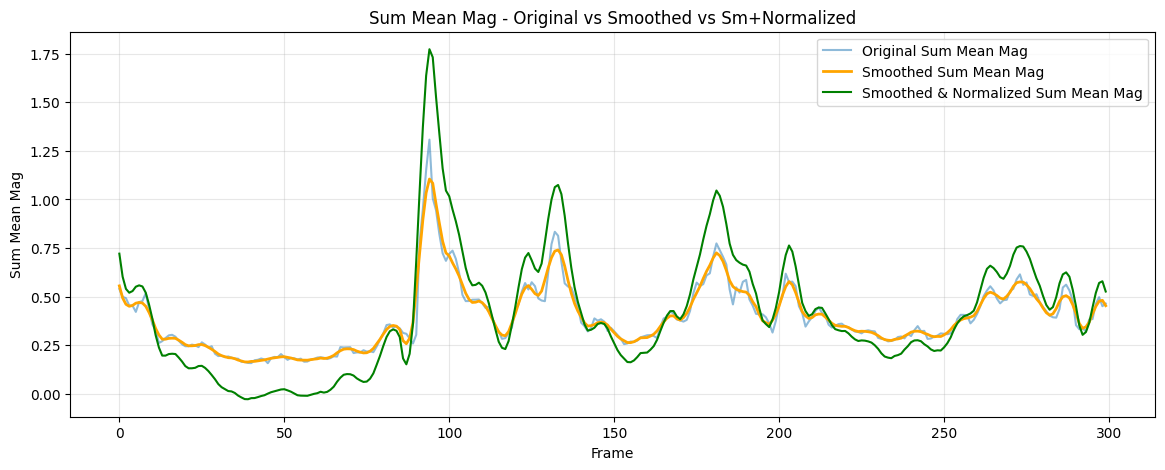

In [4]:
# Prendi la serie "sum_mean_mag" già caricata in metrics_arrays
sum_mean_mag = metrics_arrays['sum_mean_mag'][:300]  # Usa gli stessi frame del plot precedente

# Applica un filtro Savitzky-Golay per smoothing (finestra dispari, ad esempio 21, e polinomio di grado 3)
window_length_sum = 11 if len(sum_mean_mag) > 11 else (len(sum_mean_mag) // 2) * 2 + 1  # deve essere dispari e <= len(sum_mean_mag)
smoothed_sum_mean_mag = savgol_filter(sum_mean_mag, window_length=window_length_sum, polyorder=3)

# Normalizza la sequenza smooth tra 5° e 95° percentile (come fatto per la vorticity)
def normalize_percentile(arr, pmin=5, pmax=95):
    lower = np.percentile(arr, pmin)
    upper = np.percentile(arr, pmax)
    if upper > lower:
        norm = (arr - lower) / (upper - lower)
    else:
        norm = np.zeros_like(arr)
    return norm

# Normalizza la sequenza smooth tra 5° e 95° percentile
smoothed_sum_mean_mag_norm = normalize_percentile(smoothed_sum_mean_mag, pmin=5, pmax=95)

# Plot confronto tra originale e smooth
plt.figure(figsize=(14, 5))
plt.plot(sum_mean_mag, label='Original Sum Mean Mag', alpha=0.5)
plt.plot(smoothed_sum_mean_mag, label='Smoothed Sum Mean Mag', linewidth=2, color='orange')
plt.plot(smoothed_sum_mean_mag_norm, label='Smoothed & Normalized Sum Mean Mag', color='green')
plt.title('Sum Mean Mag - Original vs Smoothed vs Sm+Normalized')
plt.xlabel('Frame')
plt.ylabel('Sum Mean Mag')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


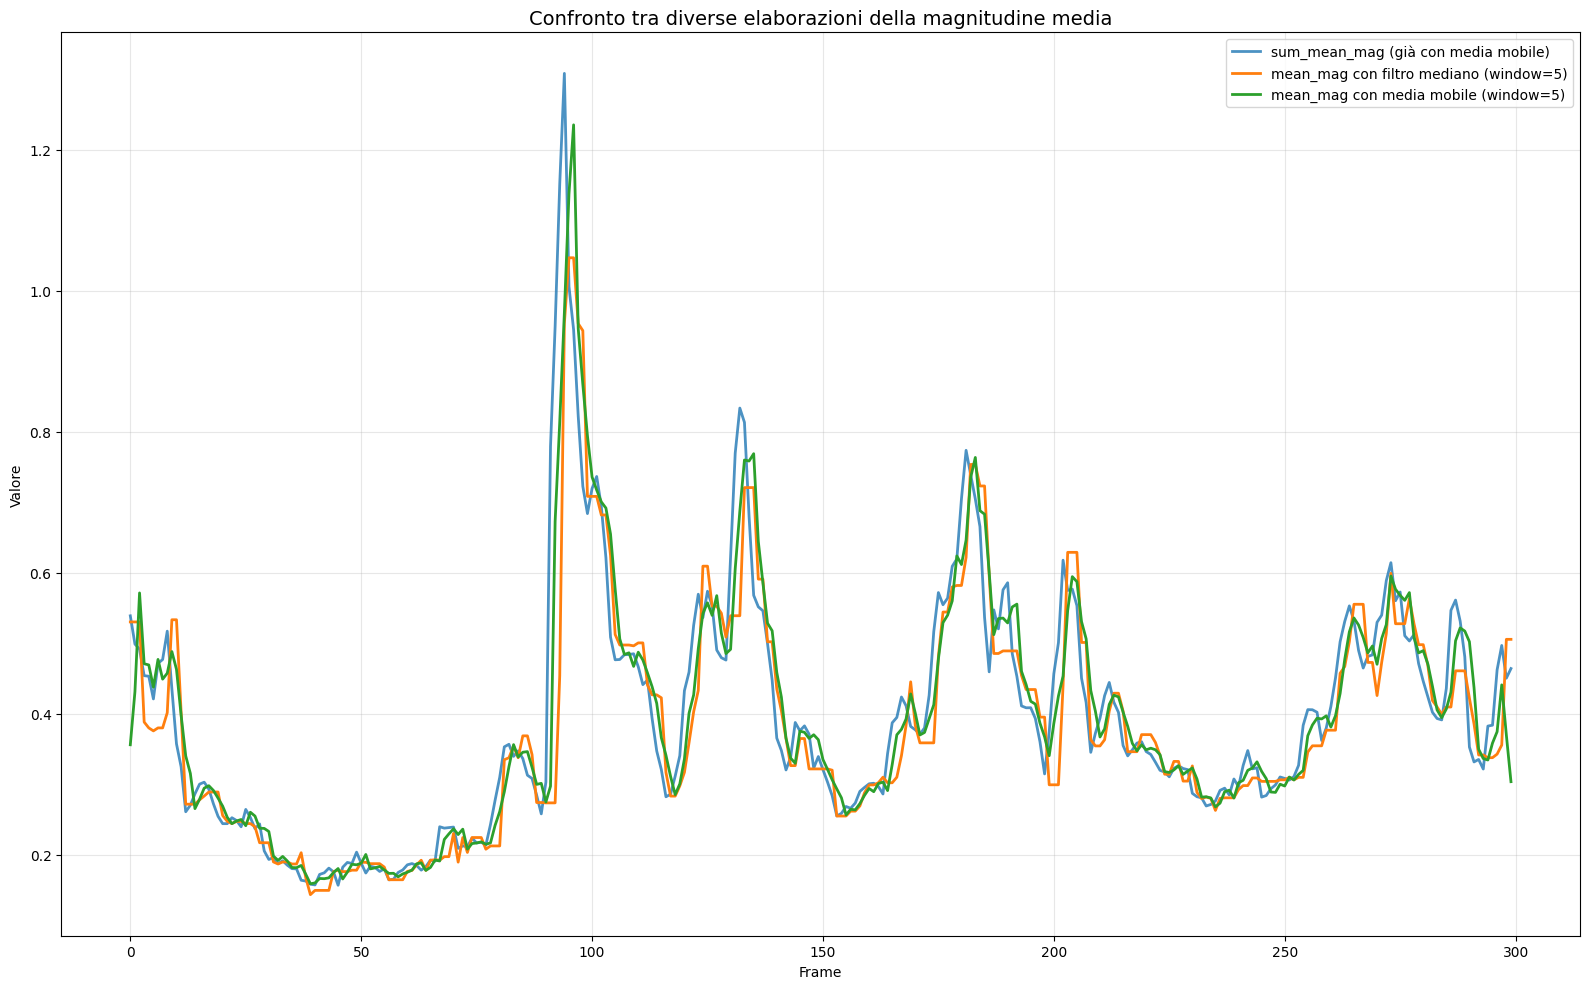

Statistiche delle serie:
sum_mean_mag - Media: 0.3935, Deviazione standard: 0.1715
mean_mag - Media: 0.3947, Deviazione standard: 0.2064
mean_mag_median - Media: 0.3803, Deviazione standard: 0.1599
mean_mag_moving_avg - Media: 0.3922, Deviazione standard: 0.1666


In [6]:
# Prendi le serie dai metrics_arrays
sum_mean_mag = metrics_arrays['sum_mean_mag'][:300]
mean_mag = metrics_arrays['mean_magnitude'][:300]

# 1. sum_mean_mag (già presente)
# 2. mean_mag (originale senza media mobile)

# 3. mean_mag con filtro mediano (window=5)
from scipy.ndimage import median_filter
mean_mag_median = median_filter(mean_mag, size=5)

# 4. mean_mag con media mobile (window=5) come quella usata per sum_mean_mag
import numpy as np
def moving_average(data, window_size):
    window = np.ones(window_size) / window_size
    return np.convolve(data, window, mode='same')

mean_mag_moving_avg = moving_average(mean_mag, 5)

# Creazione del plot
plt.figure(figsize=(16, 10))

# Plot delle 4 serie
plt.plot(sum_mean_mag, label='sum_mean_mag (già con media mobile)', linewidth=2, alpha=0.8)
# plt.plot(mean_mag, label='mean_mag (originale)', alpha=0.6)
plt.plot(mean_mag_median, label='mean_mag con filtro mediano (window=5)', linewidth=2)
plt.plot(mean_mag_moving_avg, label='mean_mag con media mobile (window=5)', linewidth=2)

plt.title('Confronto tra diverse elaborazioni della magnitudine media', fontsize=14)
plt.xlabel('Frame')
plt.ylabel('Valore')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Opzionale: stampa statistiche per confronto quantitativo
print("Statistiche delle serie:")
print(f"sum_mean_mag - Media: {np.mean(sum_mean_mag):.4f}, Deviazione standard: {np.std(sum_mean_mag):.4f}")
print(f"mean_mag - Media: {np.mean(mean_mag):.4f}, Deviazione standard: {np.std(mean_mag):.4f}")
print(f"mean_mag_median - Media: {np.mean(mean_mag_median):.4f}, Deviazione standard: {np.std(mean_mag_median):.4f}")
print(f"mean_mag_moving_avg - Media: {np.mean(mean_mag_moving_avg):.4f}, Deviazione standard: {np.std(mean_mag_moving_avg):.4f}")